# Machine Learning - Stochastic Gradient Descent & ID3 Decision Tree

By **Christa Baca (@cjb-dev)**


## Description
The goal of this program is to implement 2 machine learning (ML) algorithms, Stochastic Gradient Descent & ID3 Decision Tree, using different datasets for each algorithm respectively.


## Part 1: Import Libraries
The code here imports the libraries necessary for this program. I did not add any other libraries that weren't already in the skeleton code for the assignment, nor any premade ML libraries.

In [ ]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
import math
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


## Part 2: Stochastic Gradient Descent
The following code blocks implement the Stochastic Gradient Descent algorithm for a **regression** task, using the 'house_price_dataset.csv' data file. 

About the data file:
The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the output value for that instance that the model should predict.

In [ ]:
# read the data file
df = pd.read_csv(basePath+"house_price_dataset.csv")

# create a normalized version of the original data which is what will be used by the algorithm
# normalize data using the 0 to 1 scale:
normalized_df = (df-df.min())/(df.max()-df.min())
print(normalized_df)


     X2 house age  X3 distance to the nearest station  \
0        0.730594                            0.009513   
1        0.445205                            0.043809   
2        0.303653                            0.083315   
3        0.303653                            0.083315   
4        0.114155                            0.056799   
..            ...                                 ...   
407      0.312785                            0.627820   
408      0.127854                            0.010375   
409      0.429224                            0.056861   
410      0.184932                            0.012596   
411      0.148402                            0.010375   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
0                                1.0     0.616941      0.719323   
1                                0.9     0.584949      0.711451   
2                                0.5     0.671231      0.758896   
3                                0.5     0.6712

In [ ]:
# Activation Function - implement Sigmoid
# given 'h' compute and return 'z' based on the activation function implemented
def activation_function(h):
    return 1/(1+math.exp(-h))


In [ ]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight associated with bias as the last entry
def train(train_data, weights, learning_rate):

    # if weights are [] (empty)
    if not weights: 
        # initialize weights to 0 -- number of weights = number of variables + 1 for bias
        weights = [0 for i in range(len(train_data.columns))] # 5 x-variables + bias = 6 weights
      
    # go through each training data instance
    for index, row in train_data.iterrows():
        # get 'x' as one multi-variate data instance -- remember to append '1' at the end for the bias term
        x = row[:-1].tolist()
        x.append(1)
        # get 'y' as the ground truth value, which is the last value in the given row
        y = row[-1]
        # obtain h(x) using dot product
        h = np.dot(weights, x)
        # call the activation function with 'h' as parameter to obtain 'z'
        z = activation_function(h)

        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
        for index in range(len(weights)):
          weights[index] = weights[index] + learning_rate * (y - z) * x[index]
    
    # return the final learnt weights
    return weights


In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the average error value
def test(test_data, weights):
    # initialize average error
    average_error = 0.0

    # go through each testing data instance
    for index, row in test_data.iterrows():
        # get 'x' as one multi-variate data instance -- remember to append '1' at the end for the bias term
        x = row[:-1].tolist()
        x.append(1)
        # get 'y' as the ground truth value, which is the last value in the given row
        y = row[-1]
        # obtain h(x) using dot product
        h = np.dot(weights, x)
        # call the activation function with 'h' as parameter to obtain 'z' 
        z = activation_function(h)
        # compare 'z' with 'y' to calculate the absolute error (not least squared) for each data instance
        absolute_error = abs(z - y)
        # add to average_error total
        average_error = average_error + absolute_error

    # calculate average error by dividing it by the length of the test dataset
    average_error = average_error/len(test_data)

    # return the average error value for the given test dataset
    return average_error


Determine the **best learning rate** and then plot the graph for **training error vs learning rate**:

Error for LR of 0.01 on Training Data = 0.15100067604331127
Error for LR of 0.02 on Training Data = 0.14275510234352257
Error for LR of 0.03 on Training Data = 0.13527002197686636
Error for LR of 0.04 on Training Data = 0.12866414677660634
Error for LR of 0.05 on Training Data = 0.12308373765233763
Error for LR of 0.06 on Training Data = 0.11847112989750898
Error for LR of 0.07 on Training Data = 0.11449067389676167
Error for LR of 0.08 on Training Data = 0.11108536271344145
Error for LR of 0.09 on Training Data = 0.10809839349825949
Error for LR of 0.1 on Training Data = 0.10550658637653625
Error for LR of 0.11 on Training Data = 0.10324627418520473
Error for LR of 0.12 on Training Data = 0.10129020449965692
Error for LR of 0.13 on Training Data = 0.09955740809498081
Error for LR of 0.14 on Training Data = 0.09801807641168167
Error for LR of 0.15 on Training Data = 0.09668934531576938
Error for LR of 0.16 on Training Data = 0.09550637462198872
Error for LR of 0.17 on Training Data = 0

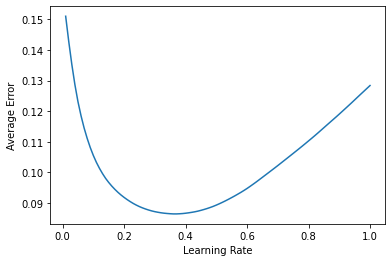

In [ ]:
# Declare list variables to hold average errors and learning rates
errors = []
learning_rates = []

# Go through all possible learning rates from 0 to 1 in increments of 0.01
# For each learning rate
for learning_rate in np.arange(0.01, 1.001, 0.01):
    # initialize weights (currently empty array)
    weights = []
    # Call the above "train" function on the entire dataset to obtain the "weights"
    weights = train(normalized_df, weights, learning_rate)
    # Use the "weights" and call the "test" function to obtain the "average_error" for training
    average_error = test(normalized_df, weights)
    # Save this "error" in a list of errors
    errors.append(average_error)
    # Append the learning_rate to the learning_rates list
    learning_rates.append(learning_rate)

# once the error values are obtained for all the learning rates, find the best learning rate (one with the least error)
# intialize variables to hold information to find best learning rate
minimum_error = errors[0]
best_learning_rate = 0.0

# iterates through errors array
for index in range(len(errors)):
    # prints learning rate and error at current index
    learning_rate_print_format = '{0:.2g}'.format(learning_rates[index]) # to round to 2 decimals
    print("Error for LR of", learning_rate_print_format, "on Training Data =", errors[index])
    # if smaller error is discovered
    if errors[index] < minimum_error:
        # update minimum error
        minimum_error = errors[index]
        # update best_learning_rate associated with minimum error
        best_learning_rate = learning_rates[index]

# prints best learning rate (should be reflected on graph)
print("\nBest learning rate =", best_learning_rate)

# also, plot the graph of learning rate (x-axis) and average error (y-axis)
plt.plot(learning_rates, errors)
plt.xlabel("Learning Rate")
plt.ylabel("Average Error")
plt.show()


Splits the dataset into two parts **(train and test)**. Performs 20 iterations on the dataset to obtain the **average errors** and **see how it changes with each iteration**.

In [ ]:
# Split the entire dataset randomly into two different parts --
# "train_data" - 70% of the entire data
train_data = df.sample(frac = 0.70) # using df that has not yet been normalized like above
# "test_data" - remaining 30% of the data
test_data = df.drop(train_data.index)

# Normalize both of them
train_data = (train_data-train_data.min())/(train_data.max()-train_data.min())
test_data = (test_data-test_data.min())/(test_data.max()-test_data.min())

# Use the "best_learning_rate" found above
# Start the weights = []
updated_weights = []

# for extra credit: creates lists to hold average training & testing errors
average_training_errors = []
average_testing_errors = []

# Perform 20 iterations on the entire dataset and for each iteration
for index in range(20):
    # Call the above "train" function on the "train_data" to obtain the updated "weights"
    updated_weights = train(train_data, updated_weights, best_learning_rate)
    # Use the "weights" and call the "test" function to obtain the "average_training_error" for the "train_data"
    average_training_error = test(train_data, updated_weights)
    # append to average training errors list
    average_training_errors.append(average_training_error)
    # Use the "weights" and call the "test" function to obtain the "average_testing_error" for the "test_data"
    average_testing_error = test(test_data, updated_weights)
    # append to average testing errors list
    average_testing_errors.append(average_testing_error)
    # Print both the average errors for the given iteration number
    print("Error for iteration", (index + 1), 'on Training data =', average_training_error)
    print("Error for iteration", (index + 1), 'on Testing data =', average_testing_error)


Error for iteration 1 on Training data = 0.1265490063001127
Error for iteration 1 on Testing data = 0.12177008641923465
Error for iteration 2 on Training data = 0.11976834961610747
Error for iteration 2 on Testing data = 0.11795981190702756
Error for iteration 3 on Training data = 0.11580337453621573
Error for iteration 3 on Testing data = 0.11692855548658862
Error for iteration 4 on Training data = 0.11356119030132739
Error for iteration 4 on Testing data = 0.11661907896904192
Error for iteration 5 on Training data = 0.11218183029814537
Error for iteration 5 on Testing data = 0.1167336876421975
Error for iteration 6 on Training data = 0.11132470985704473
Error for iteration 6 on Testing data = 0.11686950146608295
Error for iteration 7 on Training data = 0.11074194558287494
Error for iteration 7 on Testing data = 0.11694705740584226
Error for iteration 8 on Training data = 0.11034535135257875
Error for iteration 8 on Testing data = 0.1169841117031696
Error for iteration 9 on Training d

### Accuracy Plots
The following code displays graphs using the above accuracy results on the training and testing data.


<function matplotlib.pyplot.show(*args, **kw)>

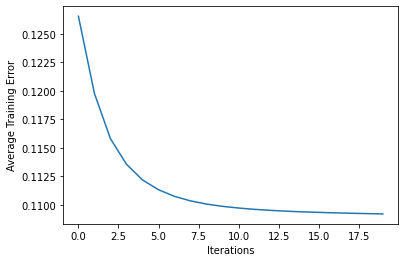

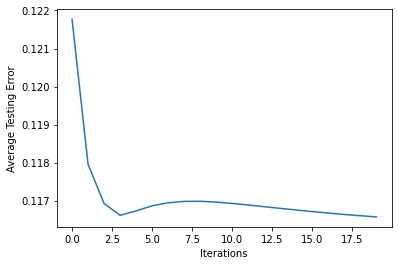

In [ ]:
# Save the above calculated error values "average_training_error" and "average_testing_error" in two different lists
# For each of the two average errors, plot a graph for iteration-number (x-axis) and average error (y-axis)
# plots average training errors
fig1 = plt.figure("Figure 1")
plt.plot(average_training_errors)
plt.xlabel("Iterations")
plt.ylabel("Average Training Error")

# plots average testin errors
fig2 = plt.figure("Figure 2")
plt.plot(average_testing_errors)
plt.xlabel("Iterations")
plt.ylabel("Average Testing Error")
plt.show


## Part 3: ID3 Decision Tree
The following code blocks implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task, i.e. each instance will have a class value of 0 or 1. It is assumed that there are **no missing values** in the train or test data. 

Here are the names of the data files that will be used:

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

*Note: Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In the decision tree, if a leaf node is reached but there are still examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If a leaf node is reached in the decision tree and there are no examples left, or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set (no pruning required). *Note: Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.*

The output should showcase the following:

*   The Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1   --   15
            attr3 = 1 : 0   --   7
        attr3 = 1 :
            attr4 = 0 : 0   --   12
            attr4 = 1 : 1   --   6
    attr1 = 1 :
        attr2 = 1 : 1   --   9

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %






In [ ]:
# Read data files
#data = pd.read_csv(basePath+"id3-weather-train.dat", sep="\s+")
data = pd.read_csv(basePath+"id3-train.dat", sep="\s+")
entire_data = data
print(data)


     attr1  attr2  attr3  attr4  attr5  attr6  class
0        1      1      0      0      0      0      0
1        0      0      1      1      0      1      0
2        0      1      0      1      1      0      0
3        0      0      1      0      0      1      1
4        0      1      0      0      0      0      0
..     ...    ...    ...    ...    ...    ...    ...
795      1      0      0      0      0      1      0
796      1      0      0      1      0      0      0
797      0      0      0      1      1      0      1
798      0      1      1      1      0      1      1
799      1      1      0      0      1      0      0

[800 rows x 7 columns]


Additional functions to **calculate entropy**, **information gain**, and **determine the best split attribute**:

In [ ]:
# function for calculating entropy & conditional entropy
def calculate_entropy(data, attribute):
    # calculates entropy for the class (last column)
    if attribute == 'class':
        # initialize variables
        t_values = len(data[data['class'] == 1]) # holds True / 1 values
        f_values = len(data[data['class'] == 0]) # holds False / 0 values
        num_rows = data.shape[0] 

        # perform entropy calculation
        entropy = ((-t_values / num_rows) * math.log((t_values / num_rows), 2) + (-f_values / num_rows) * math.log((f_values / num_rows), 2))

        # return entropy for class
        return entropy

    # calculates entropy for a non-class attribute
    else:
        # initialize variables
        conditional_entropy = 0.0

        # finds all unique values for the given attribute (ex: Outlook has 3 unique values for Sunny, Overcast, Rainy...)
        unique_values = np.unique(data[attribute])
        # iterates through each value in unique values list
        for unique_value in unique_values:
            # creates a sub-set of the original data based on the current unique attribute value (ex: only the subset of data for Outlook = Sunny)
            sub_data = data[data[attribute] == unique_value]
            # initialize variables
            t_values = len(sub_data[sub_data['class'] == 1])
            f_values = len(sub_data[sub_data['class'] == 0])
            num_rows = sub_data.shape[0]

            # if either t_values or f_values = 0, set the entropy to 0 to avoid errors with math.log
            if t_values == 0 or f_values == 0:
                # sets entropy to zero
                entropy = 0
            # otherwise, proceed to calculate non-zero entropy
            else:
                # perform entropy calculation
                entropy = ((-t_values / num_rows) * math.log((t_values / num_rows), 2) + (-f_values / num_rows) * math.log((f_values / num_rows), 2))
                # add the above result to calculate the average entropy
                conditional_entropy = conditional_entropy + ((num_rows / len(data)) * entropy)

        # return average entropy for non-class attribtue
        return conditional_entropy


In [ ]:
# function for calculating information gain
def information_gain(data, attribute):
  # calculate entropy for class
  class_entropy = calculate_entropy(data, 'class')
  # calculate average entropy for other attribute
  atrribute_conditional_entropy = calculate_entropy(data, attribute)
  # calculate IG by subtracting average entropy for attribute from entropy for class
  info_gain = class_entropy - atrribute_conditional_entropy

  # return information gain the passed attribute
  return info_gain


In [ ]:
# function to determine best variable to split on
def best_split_attribute(data, attributesRemaining):
    # initialize variables
    IG_list = [] 
    split_attribute = attributesRemaining[0] # initialized like so to return a non-blank split attribute/help avoid execution error

    # iterates through all passed-in attributes
    for index in range(len(attributesRemaining)):
        if attributesRemaining[index] != 'class':
            # call on the information gain function for this attribute
            info_gain = information_gain(data, attributesRemaining[index])
            # append the info gained to a list containing elements (attribute, associated info gain)
            IG_list.append(info_gain)

    # determine attribute with maximum info gain
    # initialize max value
    max_info_gain = IG_list[0]

    # iterate through info gain list from earlier
    for index in range(len(IG_list)):
        # determine if current info gain is higher than previous
        if IG_list[index] > max_info_gain:
            # update highest info gain found
            max_info_gain = IG_list[index]
            # update split attribute associated with highest info gain
            split_attribute = attributesRemaining[index]

    # return best attribute to split
    return split_attribute 
  

Added a class to create structure for Node objects in the decision tree:

In [ ]:
# Create node class to make decision tree
class Node(object):
    # define node variables
    def __init__(self, parent = None):
        # general items for nodes:
        self.children = [] # array of child nodes (addresses)
        self.split_attribute = None # the attribute used to split (a string, ex: 'attr1')
        self.parent_value = None # a value from the parent node (ex: for parent Outlook, values are Sunny (0), Overcast (1), Rainy (2), etc.)
        self.parent = parent # parent node, passed in

        # made specifically for leaf nodes:
        self.class_output_label = None 
        self.num_rows = None 
        self.is_leaf = False


    # function to print node object details
    def print_obj(self):
        print('children =\t', self.children)
        print('split attr =\t', self.split_attribute)
        print('parent =\t', self.parent)
        print('parent value =\t', self.parent_value)
        print('num_rows =\t', self.num_rows)
        print('class label =\t', self.class_output_label)
        print('is leaf = \t', self.is_leaf)
        print()


ID3 function for creating decision tree:

In [ ]:
# Pseudocode for the ID3 algorithm. Use this to create function(s).
# def ID3(data, root, attributesRemaining):
def ID3(data, root, attributesRemaining):
    # initialize variables 
    t_values = len(data[data['class'] == 1]) # holds True / 1 values
    f_values = len(data[data['class'] == 0]) # holds False / 0 values

    # If you reach a leaf node in the decision tree and have no examples (rows) left or the examples are equally split among multiple classes
    if not attributesRemaining and ((data.shape[0] == 0) or (t_values == f_values)): 
        # Choose and assign the class that is most frequent in the entire training set and return the updated tree
        root.class_output_label = entire_data.mode()['class'][0]
        root.is_leaf = True
        return root

    # If all the instances have only one class label
    # Make this as the leaf node and use the label as the class value of the node and return the updated tree
    # if all classes are 1, change output label to 1
    if t_values == data.shape[0]: 
        root.class_output_label = 1
        root.is_leaf = True
        return root
    # if all classes are 0, change output label to 0
    elif f_values == data.shape[0]:
        root.class_output_label = 0
        root.is_leaf = True
        return root

    # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
    if not attributesRemaining and (t_values != f_values):
        # Assign the most frequent class among the instances at the leaf node and return the updated tree
        root.class_output_label = data.mode()['class'][0]
        root.is_leaf = True
        return root

    # Below is the code for the splitting process...
    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    split_attr = best_split_attribute(data, attributesRemaining)
    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    attRem = attributesRemaining.copy() # create a copy of the attributesRemaining to not mess with it 
    attRem.remove(split_attr)
    # update root node with split attribute decision
    root.split_attribute = split_attr

    # find all unique values in split attribute
    unique_values = np.unique(data[split_attr])
    # for each unique val for split_attr:
    for unique_val in unique_values:
        # sub_data = rows where split_attr value = val
        sub_data = data[data[split_attr] == unique_val] 

        # child = create a child node for that value
        child = Node(root)
        child.num_rows = sub_data.shape[0] # updates rows for child node
        child.parent_value = unique_val 
        # append the child to the root node
        root.children.append(child)

        # Recursive call ID3(sub_data, child, attributesRemaining)
        ID3(sub_data, child, attRem)

    # return the root as the tree
    return root


These last functions are for traversing the tree, printing it, and predicting the accuracy when tested using the specified files:

In [ ]:
# traverses tree using DFS
# initialize variables 
tabs = ''

# function for DFS traversal method to print generated ID3 tree
def depth_first_search(root, tabs):
    # for printing leaves:
    if root.is_leaf == True:
        print(tabs, root.parent.split_attribute, '=', root.parent_value, ':', root.class_output_label, '--', root.num_rows) 
    # for printing non-leaf nodes:
    else:
        # increase tabs
        tabs += '    '

        # print node (with newline afterwards) if it has non-leaf children
        for child in root.children:
            if child.is_leaf == False:
                print(tabs, root.split_attribute, '=', child.parent_value)
              
            # recursive call for DFS
            depth_first_search(child, tabs)


In [ ]:
# read in data files for training/testing accuracy
training_data = entire_data # unedited copy from earlier, since the above tree just uses id3-test.dat
testing_data = pd.read_csv(basePath+"id3-test.dat", sep="\s+")


In [ ]:
# function to predict class output values from a given dataset (using the DFS traversal method like above)
def predict(root, data_row):
    # if the node reached is a leaf, return the class output label
    if root.is_leaf == True:           
        return root.class_output_label

    # otherwise, for each child in the current node
    for child in root.children:
        # if the child's parent value is equal to the data row's value at the root's split attribute
        if child.parent_value == data_row[root.split_attribute]:
          # set child as the root
          root = child
          # break from loop
          break
    
    # continue to traverse through tree with recursive call
    return predict(root, data_row)


In [ ]:
# function to udpate prediction results array based off answers from predict function
def predict_results_per_row(root, data):
    #array to hold results of prediction
    prediction_results = [0] * data.shape[0]

    # send in each row to get prediction function
    for index, row in data.iterrows():
        # set data instance row as current row
        data_row = row
        # send each row from dataset into prediction function
        prediction_results[index] = predict(root, data_row)

    # return results array
    return prediction_results


In [ ]:
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
attributesRemaining = data.columns # initialize attributesRemaining before calling ID3 function
attributesRemaining = list(attributesRemaining[0:-1])
# Call function to create tree
root = ID3(data, Node(), attributesRemaining)

# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
# For each training instance, predict the output label
train_prediction_results = predict_results_per_row(root, training_data)

# initialize variables
training_accuracy = 0.0

# iterate through training dataset to compare values
for index, row in training_data.iterrows():
    # Compare it with the ground truth class label and calculate the accuracy accordingly
    if train_prediction_results[index] == row['class']:
        # increment training accuracy for each correct prediction
        training_accuracy = training_accuracy + 1

# print("Accuracy on the Training data = ", accuracy, "%")
print('Accuracy on the Training data =', (training_accuracy / training_data.shape[0]))


# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
# For each testing instance, predict the output label
test_prediction_results = predict_results_per_row(root, testing_data)
    
# initialize variables
testing_accuracy = 0.0

# iterate through testing dataset to compare values
for index, row in testing_data.iterrows():
    # Compare it with the ground truth class label and calculate the accuracy accordingly
    if test_prediction_results[index] == row['class']:
        # increment testing accuracy for each correct prediction
        testing_accuracy = testing_accuracy + 1

#print("Accuracy on the Test data = ", accuracy, "%")      
print('Accuracy on the Test data =', (testing_accuracy / testing_data.shape[0]))
print()

# function to print tree using DFS
print('Generated decision tree:')
depth_first_search(root, tabs)


Accuracy on the Training data = 0.89375
Accuracy on the Test data = 0.8719211822660099

Generated decision tree:
     attr5 = 0
         attr6 = 0
             attr2 = 0
                 attr1 = 0
                     attr4 = 0
                         attr3 = 0 : 0 -- 9
                         attr3 = 1 : 0 -- 12
                     attr4 = 1
                         attr3 = 0 : 0 -- 13
                         attr3 = 1 : 0 -- 14
                 attr1 = 1
                     attr4 = 0
                         attr3 = 0 : 0 -- 15
                         attr3 = 1 : 0 -- 10
                     attr4 = 1 : 0 -- 30
             attr2 = 1
                 attr4 = 0
                     attr3 = 0 : 0 -- 25
                     attr3 = 1
                         attr1 = 0 : 0 -- 11
                         attr1 = 1 : 0 -- 18
                 attr4 = 1
                     attr1 = 0
                         attr3 = 0 : 0 -- 10
                         attr3 = 1 : 0 -- 18
             

## Part 4: Extra Credit - Learning Curve
Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


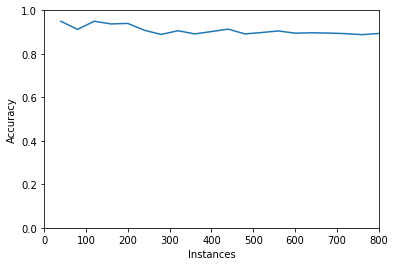

In [ ]:
# *** Partial EC implementation attempt-- recursion issues encountered when testing predictions using test data file.
# initialize variables
random_df = pd.DataFrame() # create empty dataframe
instances = []
accuracy_list = []

# Loop through to select the number of instances 'x' in increments of 40
for index in np.arange(40, data.shape[0] + 40, 40): # added 40 to stop value so all 800 rows can be iterated (versus 760)
    # append x instances in increments of 40
    instances.append(index)

# For each 'x',
for x in instances:
    # Randomly select 'x' instances
    random_df = data.sample(x)
    random_df = random_df.reset_index(drop = True) # resets indices to start properly at 0

    # initialize attributesRem to be used for ID3 finction call
    attributesRem = random_df.columns
    attributesRem = list(attributesRem[0:-1])
    # Create the ID3 decision tree using those instances
    EC_tree = ID3(random_df, Node(), attributesRem)
  
    # Call on function for predicting values using newly generated tree
    EC_prediction_results = predict_results_per_row(EC_tree, random_df) 

    # initialize variables
    EC_accuracy = 0.0
    
    # iterate through training dataset to compare values
    for index, row in random_df.iterrows():
        # Compare it with the ground truth class label and calculate the accuracy accordingly
        if EC_prediction_results[index] == row['class']:
            # Calculate the accuracy of the ID3 tree created on the Test data
            EC_accuracy = EC_accuracy + 1
    
    # update accuracy
    EC_accuracy = EC_accuracy / random_df.shape[0]
    # append to accuracy list
    accuracy_list.append(EC_accuracy)
    
# Plot the learning curve using the accuracy values
# X-axis will be the number of training instances used for creating the tree
# Y-axis will be the accuracy in % on the Test data
plt.plot(instances, accuracy_list)
plt.xlim([0, 800])
plt.ylim([0, 1])
plt.xlabel("Instances")
plt.ylabel("Accuracy")
plt.show()
